# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [1]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [2]:
np_vector = df.values.reshape((2000,3))
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.16602    0.50408  ]
 [-0.63563   -0.63486   -0.9802   ]
 [-0.027678  -0.28429    0.99149  ]
 [ 0.0094964  0.73219   -0.68073  ]
 [ 0.79145   -0.2936     0.98416  ]]


min:-0.999760, max:0.997750, median:0.000000, mean:0.004571


(array([143., 122., 198., 133., 187., 568., 195., 170., 122., 162.]),
 array([-0.99976 , -0.800009, -0.600258, -0.400507, -0.200756, -0.001005,
         0.198746,  0.398497,  0.598248,  0.797999,  0.99775 ]),
 <a list of 10 Patch objects>)

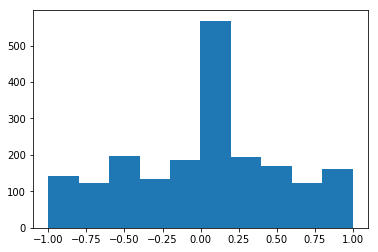

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
tk = np_vector[:,2]
print('min:%f, max:%f, median:%f, mean:%f' % (np.min(tk), np.max(tk), np.median(tk), np.mean(tk)))
plt.hist(tk, bins=10)

## Data Preparation

In [3]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[ 0.       0.      -0.17   ]
 [-0.81997 -0.67808 -0.643  ]
 [-0.59478  0.64252 -0.52569]
 [ 0.       0.       0.     ]
 [ 0.67119 -0.12055 -0.60731]]


In [4]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[ 0.       0.     ]
 [-0.81997 -0.67808]
 [-0.59478  0.64252]
 [ 0.       0.     ]
 [ 0.67119 -0.12055]]
output shape:(2000,)
[-0.17    -0.643   -0.52569  0.      -0.60731]


In [5]:
pct_training = 0.8
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1440, Validation Size: 160, Test Size: 400
train_in shape:(1440, 2)


# Model Construction

In [29]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1))

# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [30]:
history = model.fit(train_in,
                    train_out,
                    epochs=40,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1440 samples, validate on 160 samples
Epoch 1/40
1440/1440 [==============================] - 0s 188us/step - loss: 0.4008 - acc: 0.2083 - val_loss: 0.3243 - val_acc: 0.2500
Epoch 2/40
1440/1440 [==============================] - 0s 54us/step - loss: 0.3377 - acc: 0.2111 - val_loss: 0.2865 - val_acc: 0.2562
Epoch 3/40
1440/1440 [==============================] - 0s 49us/step - loss: 0.3016 - acc: 0.2132 - val_loss: 0.2663 - val_acc: 0.2625
Epoch 4/40
1440/1440 [==============================] - 0s 52us/step - loss: 0.2804 - acc: 0.2146 - val_loss: 0.2550 - val_acc: 0.2625
Epoch 5/40
1440/1440 [==============================] - 0s 48us/step - loss: 0.2684 - acc: 0.2153 - val_loss: 0.2491 - val_acc: 0.2625
Epoch 6/40
1440/1440 [==============================] - 0s 54us/step - loss: 0.2617 - acc: 0.2153 - val_loss: 0.2457 - val_acc: 0.2625
Epoch 7/40
1440/1440 [==============================] - 0s 51us/step - loss: 0.2584 - acc: 0.2153 - val_loss: 0.2433 - val_acc: 0.2625
Epoch 8

In [31]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

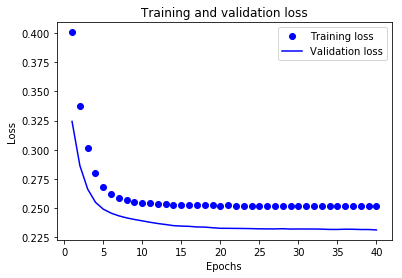

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

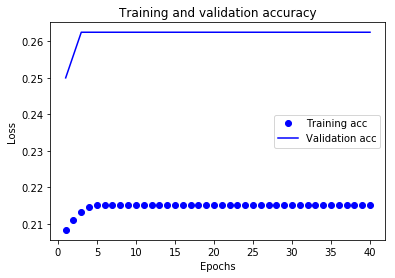

In [33]:
plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

400/400 [==============================] - 0s 122us/step


[0.24284163236618042, 0.2125]

Accuracy in test data `21%`, loss `0.24` 